In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# import src.data_handler as data_handler
import src.models as models
import os
from IPython.display import display

project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
np.random.seed(42)

In [2]:
clustering_df : pd.DataFrame = pd.read_csv(f"{project_root}/TP04/data/raw/clustering.csv").drop(columns=['index'])
clustering_df.info()
clustering_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   A       4999 non-null   int64
 1   B       4999 non-null   int64
dtypes: int64(2)
memory usage: 78.2 KB


,A,B
0,812954,643720
1,868217,609046
2,920248,607272
3,841621,639394
4,843907,598777


In [3]:
# clustering_normalized_df : pd.DataFrame = clustering_df / clustering_df.max()
# clustering_normalized_df.info()
# clustering_normalized_df.head()
# clustering_normalized_df.to_csv(f"{project_root}/TP04/data/processed/clustering_normalized.csv")

In [4]:
X : np.ndarray = clustering_df.to_numpy()
k_means_01 : models.KMeans = models.KMeans(X, 20)
k_means_01.fit_centroids()
print("")
print("CENTROIDES")
for c, i in zip(k_means_01.mu, range(1, len(k_means_01.mu) + 1)):
    print(f"k = {i} | A: {c[0]}, B: {c[1]}")

done at iteration  15

CENTROIDES
k = 1 | A: 276307, B: 750552
k = 2 | A: 404784, B: 156110
k = 3 | A: 343786, B: 190675
k = 4 | A: 678954, B: 149574
k = 5 | A: 534789, B: 889914
k = 6 | A: 176515, B: 236939
k = 7 | A: 360916, B: 399395
k = 8 | A: 454516, B: 348822
k = 9 | A: 743011, B: 489570
k = 10 | A: 445036, B: 610852
k = 11 | A: 225449, B: 718363
k = 12 | A: 809538, B: 797406
k = 13 | A: 836493, B: 636549
k = 14 | A: 550270, B: 436185
k = 15 | A: 485885, B: 830683
k = 16 | A: 119591, B: 243004
k = 17 | A: 198591, B: 478248
k = 18 | A: 808125, B: 234833
k = 19 | A: 634118, B: 716441
k = 20 | A: 570000, B: 241011


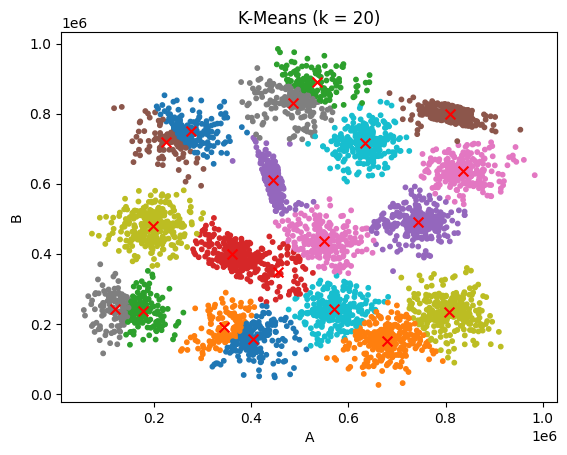

In [5]:
k_means_01.plot_clusters_2d()

done at iteration  6
done at iteration  11
done at iteration  15
done at iteration  15
done at iteration  26
done at iteration  37
done at iteration  9
done at iteration  34
done at iteration  41
done at iteration  37
done at iteration  33
done at iteration  16
done at iteration  25
done at iteration  18
done at iteration  16
done at iteration  31
done at iteration  48
done at iteration  28
done at iteration  19
done at iteration  22
done at iteration  26
done at iteration  29
done at iteration  39
done at iteration  18
done at iteration  40
done at iteration  62
done at iteration  27
done at iteration  61
done at iteration  37
done at iteration  41
done at iteration  31
done at iteration  36
done at iteration  39
done at iteration  32
done at iteration  18
done at iteration  29
done at iteration  25
done at iteration  46
done at iteration  32


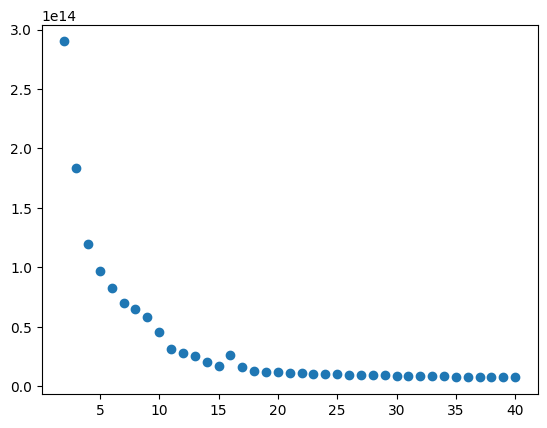

In [6]:
k_max : int = 40
k_means_variable : models.KMeans
losses_k : list[float] = []
for k in range(2, k_max + 1):
    k_means_variable = models.KMeans(X, k)
    k_means_variable.fit_centroids()
    k : np.ndarray = np.argmin(k_means_variable.calculate_distances(), axis=0)
    losses_k.append(np.sum(np.linalg.norm(X - k_means_variable.mu[k], axis=1) ** 2))
plt.scatter(range(2, k_max+1), losses_k)
plt.show()